In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [6]:
# visualisation du jeu de données

df = pd.read_csv("data.csv")
df

,num_ligne,ID_Client,Nom,Score_Credit,Pays,Sex,Age,Tenure,Balance,Num_Produit,il_a_CrCard,Membre_actif,Salaire_estime,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
#Je regarde s'il y a des valeur manquantes

df.isnull().sum()

num_ligne         0
ID_Client         0
Nom               0
Score_Credit      0
Pays              0
Sex               0
Age               0
Tenure            0
Balance           0
Num_Produit       0
il_a_CrCard       0
Membre_actif      0
Salaire_estime    0
Exited            0
dtype: int64

Pas de valeur manquantes donc pas de traitement à effectuer dans ce sens

In [12]:
#Notre cible est de prédire la dernière colonne, ce sera notre target.
y = df['Exited'].values
print('il y a {} valeurs uniques'.format(len(np.unique(y))))

il y a 2 valeurs uniques


Ces valeurs sont '0' et '1', on utilisera alors un classifieur binaire

Je supprime les données non numériques qui n'impacteront pas le résultat

In [14]:
df = df.drop('num_ligne', axis = 1)
df = df.drop('ID_Client', axis = 1)
df = df.drop('Nom', axis = 1)
df

,Score_Credit,Pays,Sex,Age,Tenure,Balance,Num_Produit,il_a_CrCard,Membre_actif,Salaire_estime,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [15]:
# j'encode la variable 'Sex'

encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])
df

,Score_Credit,Pays,Sex,Age,Tenure,Balance,Num_Produit,il_a_CrCard,Membre_actif,Salaire_estime,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [16]:
# Je sépare la colonne pays en 3 colonnes, une pour chaque pays

df = pd.get_dummies(df)
df

,Score_Credit,Sex,Age,Tenure,Balance,Num_Produit,il_a_CrCard,Membre_actif,Salaire_estime,Exited,Pays_France,Pays_Germany,Pays_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [17]:
# séparation du jeu de donnés

X = df.drop('Exited', axis = 1).values
X.shape

(10000, 12)

In [18]:
# Jeux de test et d'apprentisage

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Les différentes méthodes d'apprentissage

In [19]:
# regression logistique

reg = LogisticRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
score

0.7865

Le score d'accuracy est de 0.7865 avec cette méthode

In [21]:
# SVM
from sklearn import svm

result = svm.SVC()
result.fit(X_train, y_train)
y_pred = result.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
score

0.796

Le score d'accuracy est de 0.796 avec cette méthode

In [24]:
# réseau de neurone
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

X.shape
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [25]:
for i in range(8):
    X_train = np.concatenate((X_train, X_train), axis = 0)
    y_train = np.concatenate((y_train, y_train), axis = 0)

Epoch 1/5
16384/16384 [==============================] - 34s 2ms/step - loss: 0.3138 - accuracy: 0.8693 - val_loss: 0.2426 - val_accuracy: 0.8962
Epoch 2/5
16384/16384 [==============================] - 27s 2ms/step - loss: 0.2263 - accuracy: 0.9044 - val_loss: 0.1848 - val_accuracy: 0.9243
Epoch 3/5
16384/16384 [==============================] - 27s 2ms/step - loss: 0.1805 - accuracy: 0.9242 - val_loss: 0.1567 - val_accuracy: 0.9291
Epoch 4/5
16384/16384 [==============================] - 32s 2ms/step - loss: 0.1506 - accuracy: 0.9376 - val_loss: 0.1333 - val_accuracy: 0.9457
Epoch 5/5
16384/16384 [==============================] - 28s 2ms/step - loss: 0.1280 - accuracy: 0.9486 - val_loss: 0.1173 - val_accuracy: 0.9511
0.818


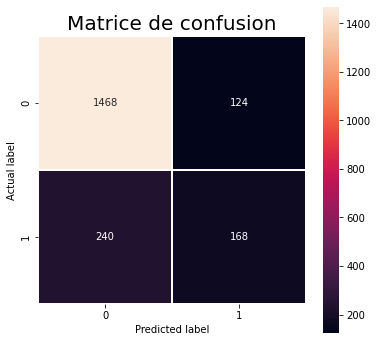

In [31]:
import seaborn as sns

model = tf.keras.Sequential([
    tf.keras.layers.Dense(36, activation = 'relu', input_shape = (12,)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'rmsprop',
    metrics = ['accuracy']
)

history = model.fit(X_train,
                   y_train,
                   epochs = 5,
                   batch_size = 100,
                   validation_split = 0.2
                   )

y_pred = model.predict_classes(X_test)
score = metrics.accuracy_score(y_test, y_pred)

print(score)

cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6, 6))
sns.heatmap(cm, annot = True, fmt='.0f', linewidth =.5, square = True, cmap = 'rocket')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Matrice de confusion", size = 20)
plt.show()

Le score d'accuracy est à 0.818, ce que est le plus élevé des 3, le réseau de neurone est la méthode la plus efficace pour traiter cette problématique.